## Loading Marketing Dataset

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
df = pd.read_csv('marketing_data.csv') 
print(df.head()) 

   customer_id  annual_spending  frequency  campaign_success  churn
0            1             2500          5                 1      0
1            2             1200          3                 0      1
2            3             3500          8                 1      0
3            4             1900          4                 0      1
4            5             3000          6                 1      0


## Summary Statistics

In [5]:
 print(df.describe()) 

       customer_id  annual_spending  frequency  campaign_success      churn
count     10.00000         10.00000   10.00000         10.000000  10.000000
mean       5.50000       2370.00000    4.80000          0.600000   0.500000
std        3.02765       1155.71046    2.65832          0.516398   0.527046
min        1.00000        500.00000    1.00000          0.000000   0.000000
25%        3.25000       1750.00000    3.00000          0.000000   0.000000
50%        5.50000       2300.00000    4.50000          1.000000   0.500000
75%        7.75000       2950.00000    6.75000          1.000000   1.000000
max       10.00000       4500.00000    9.00000          1.000000   1.000000


## Customer Segmentation

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


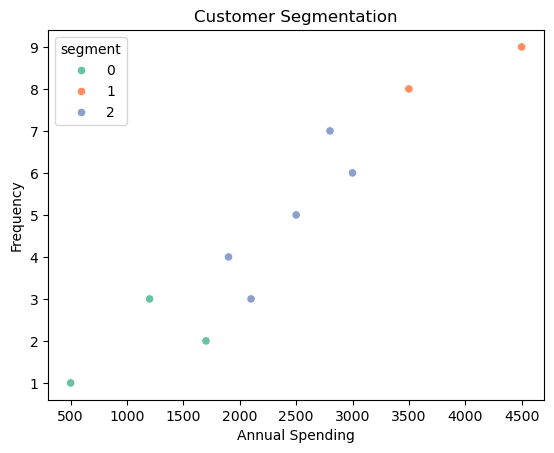

In [10]:
X = df[['annual_spending', 'frequency']]
kmeans = KMeans(n_clusters=3)
df['segment'] = kmeans.fit_predict(X)
sns.scatterplot(x='annual_spending', y='frequency', hue='segment', data=df, palette='Set2')
plt.title("Customer Segmentation")
plt.xlabel("Annual Spending")
plt.ylabel("Frequency")
plt.show()

## Analyzing Marketing Campaign Success 

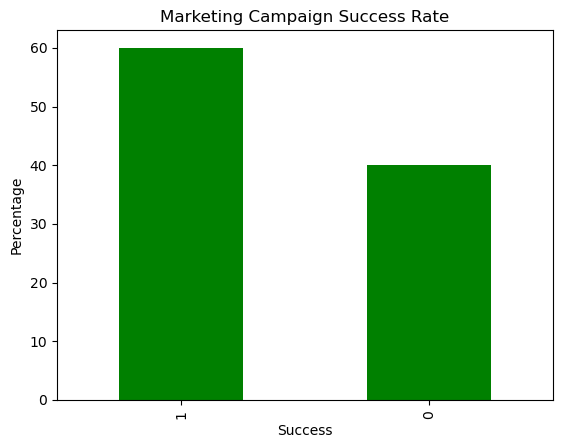

In [13]:
campaign_success_rate = df['campaign_success'].value_counts(normalize=True) * 100
campaign_success_rate.plot(kind='bar', color='green')
plt.title("Marketing Campaign Success Rate")
plt.xlabel("Success")
plt.ylabel("Percentage")
plt.show()

## Predicting Customer Churn 

   customer_id  annual_spending  frequency  campaign_success  churn
0            1             2500          5                 1      0
1            2             1200          3                 0      1
2            3             3500          8                 1      0
3            4             1900          4                 0      1
4            5             3000          6                 1      0
       customer_id  annual_spending  frequency  campaign_success      churn
count     10.00000         10.00000   10.00000         10.000000  10.000000
mean       5.50000       2370.00000    4.80000          0.600000   0.500000
std        3.02765       1155.71046    2.65832          0.516398   0.527046
min        1.00000        500.00000    1.00000          0.000000   0.000000
25%        3.25000       1750.00000    3.00000          0.000000   0.000000
50%        5.50000       2300.00000    4.50000          1.000000   0.500000
75%        7.75000       2950.00000    6.75000          1.00

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


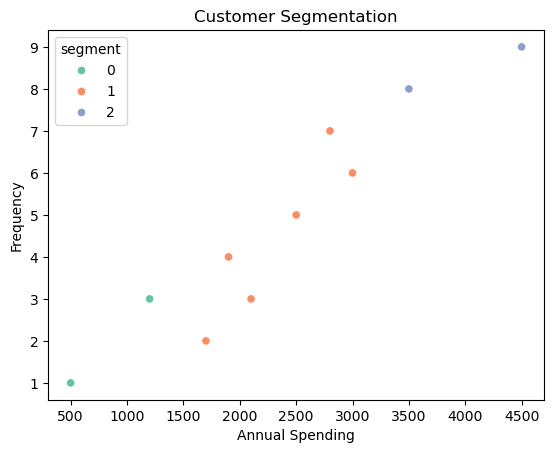

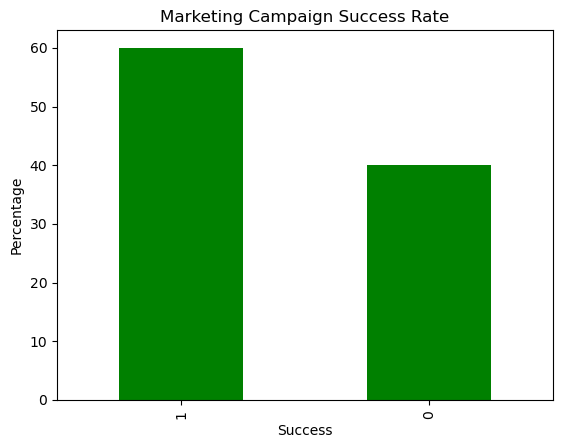

Customer Churn Prediction Accuracy: 33.33333333333333%


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
df = pd.read_csv('marketing_data.csv')
print(df.head())

print(df.describe()) 

sns.scatterplot(x='annual_spending', y='frequency', hue='segment', data=df, palette='Set2')
plt.title("Customer Segmentation")
plt.xlabel("Annual Spending")
plt.ylabel("Frequency")
plt.show()

campaign_success_rate = df['campaign_success'].value_counts(normalize=True) * 100
campaign_success_rate.plot(kind='bar', color='green')
plt.title("Marketing Campaign Success Rate")
plt.xlabel("Success")
plt.ylabel("Percentage")
plt.show()

X= df[['annual_spending', 'frequency', 'segment']]  
y= df['churn']  
X_train, X_test, y_train, y_test = train_test_split(X_churn, y_churn, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Customer Churn Prediction Accuracy: {accuracy * 100}%")